### Processamento de gráficos para Relatório 2 de Conjuntura de Macroeconomia I
#### Aluno: Pedro Luís Rickli Torques
#### Semestre: 2025/1

#### Imports

In [ ]:
%pip install sgs2
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sgs2 as sgs
import time

#### Exercício 1

In [2]:
# Requisição
# A API do Bacen parece meio instável, por vezes as requisições funcionam e por vezes não
# Por melhores práticas eu salvaria essas tabelas localmente, porém para simplificar a verificação do professor preferi deixá-las apenas como uma requisição
# para atestar veracidade
tb_divmobliq = sgs.dataframe({2216: "Dívida Mobiliária", 4382: "PIB"}, start='2002-01-01', end='2025-01-01')
time.sleep(10)
tb_NFSP = sgs.dataframe({5793: "Déficit Primário em proporção do PIB"}, start='2002-01-01', end='2025-01-01')
time.sleep(10)
jur1 = sgs.dataframe({432: "Meta SELIC do COPOM"}, start='2002-01-01', end='2012-01-01')
time.sleep(10)
jur2 = sgs.dataframe({432: "Meta SELIC do COPOM"}, start='2012-01-02', end='2022-01-01')
time.sleep(10)
jur3 = sgs.dataframe({432: "Meta SELIC do COPOM"}, start='2022-01-02', end='2025-01-01')
tb_jur = pd.concat([jur1, jur2, jur3])
time.sleep(10)
tb_pibgrowth = sgs.dataframe({22109: "PIB"}, start='2002-01-01', end='2025-01-01')
tb_pibgrowth['Crescimento do PIB'] = tb_pibgrowth['PIB'].pct_change()*100

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

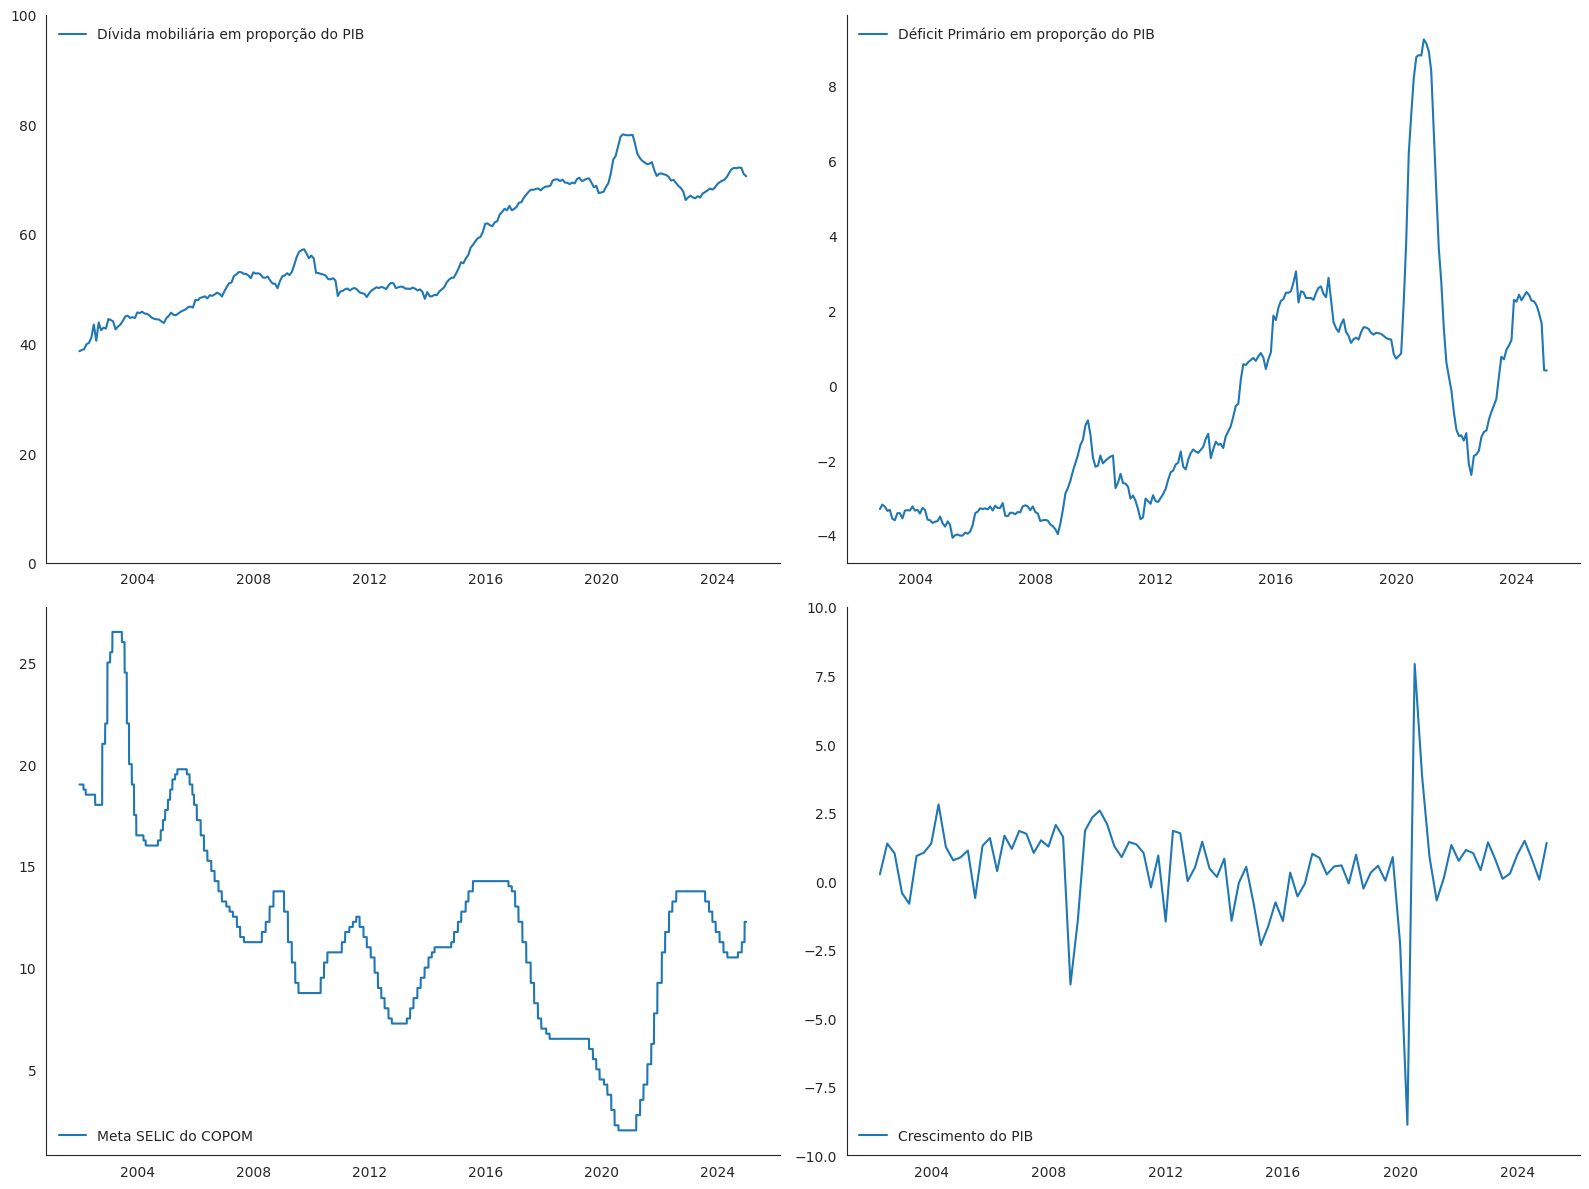

In [52]:
# Cálculo da proporção Dívida/PIB
def divpib(x):
    return (x['Dívida Mobiliária'] / x['PIB'])*100
tb_divmobliq[f'Dívida mobiliária em proporção do PIB'] = tb_divmobliq.apply(divpib, axis=1)


# Graficagem
tb_divmobliq_graf = tb_divmobliq["Dívida mobiliária em proporção do PIB"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')
tb_NFSP_graf = tb_NFSP["Déficit Primário em proporção do PIB"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')
tb_jur_graf = tb_jur["Meta SELIC do COPOM"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')
tb_pibgrowth_graf = tb_pibgrowth["Crescimento do PIB"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')

tb_jur

sns.set_style("white")

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.lineplot(data=tb_divmobliq_graf, x='data', y='values', hue='classif')
plt.title(None)
plt.xlabel(None)
plt.ylabel(None)
plt.ylim(0, 100)
sns.despine()

plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

plt.subplot(2, 2, 2)
sns.lineplot(data=tb_NFSP_graf, x='data', y='values', hue='classif')
plt.title(None)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(frameon=False, loc='upper left')
plt.tight_layout()

plt.subplot(2, 2, 3)
sns.lineplot(data=tb_jur_graf, x='data', y='values', hue='classif')
plt.title(None)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(frameon=False, loc='lower left')
plt.tight_layout()

plt.subplot(2, 2, 4)
sns.lineplot(data=tb_pibgrowth_graf, x='data', y='values', hue='classif')
plt.title(None)
plt.xlabel(None)
plt.ylabel(None)
plt.ylim(-10, 10)
sns.despine()

plt.legend(frameon=False, loc='lower left')
plt.tight_layout()

plt.show()

#### Exercício 2

In [35]:
# Requisição
# A API do Bacen parece meio instável, por vezes as requisições funcionam e por vezes não
tb_ipca = sgs.dataframe({13522: "IPCA"}, start='2022-01-01', end='2025-01-01')
#time.sleep(10)
tb_meta = sgs.dataframe({13521: "Meta de inflação anual"}, start='2022-01-01', end='2025-01-01')
tb_jur2022 = sgs.dataframe({432: "Meta SELIC do COPOM"}, start='2022-01-01', end='2025-01-01')
tb_meta = tb_meta.resample('MS').ffill()
tb_meta["Banda inferior"] = tb_meta["Meta de inflação anual"] - 1.5
tb_meta["Banda superior"] = tb_meta["Meta de inflação anual"] + 1.5

/tmp/ipython-input-69-262495714.py:34: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 3
  plt.legend(handles=handles, labels=["IPCA", "Meta de inflação anual", "Bandas da meta"], frameon=False, loc='upper right')


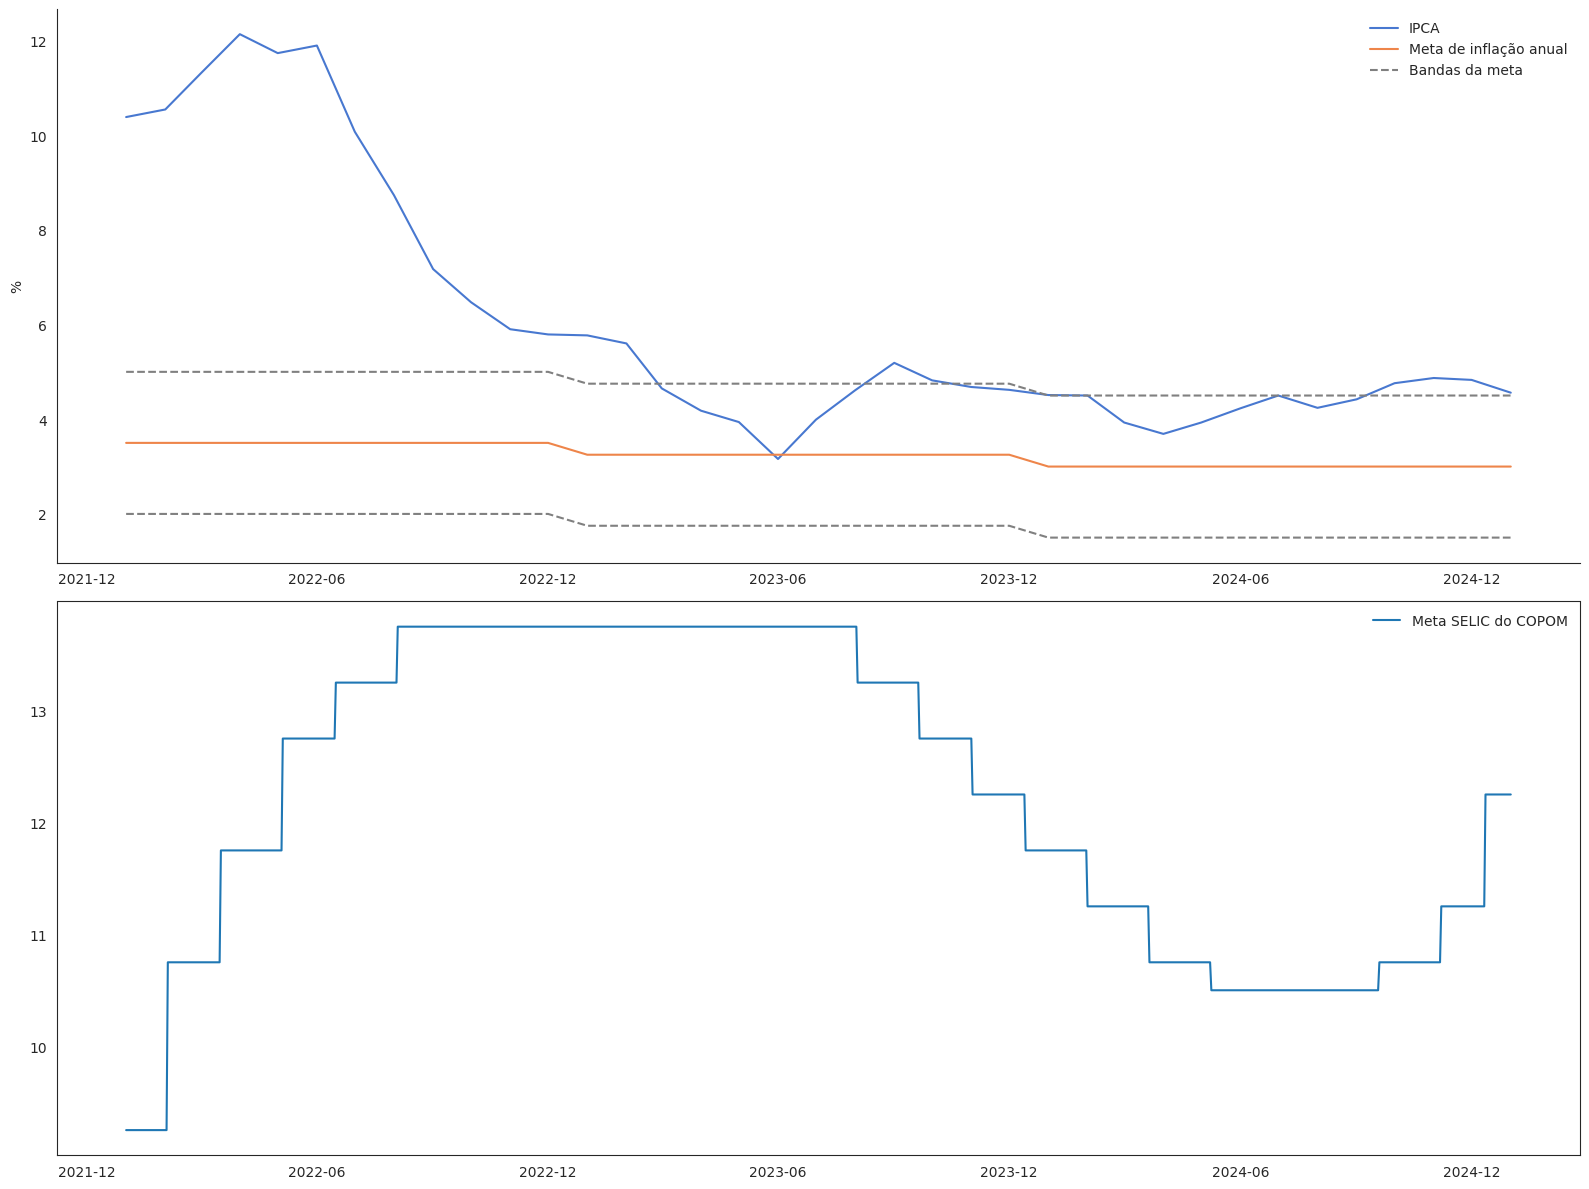

In [69]:
# Graficagem
tb_ipca_graf = tb_ipca["IPCA"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')
tb_meta_graf = tb_meta["Meta de inflação anual"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')
tb_bandalower_graf = tb_meta["Banda inferior"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')
tb_bandaupper_graf = tb_meta["Banda superior"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')
tb_jur2022_graf = tb_jur2022["Meta SELIC do COPOM"].reset_index().melt(id_vars='data', var_name='classif', value_name='values')


sns.set_style("white")
sns.set_style("white")
palette = sns.color_palette(['grey'], 2)

plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
lineplot = sns.lineplot(
    data=pd.concat([tb_ipca_graf,tb_meta_graf]),
    x='data',
    y='values',
    hue='classif',
    palette="muted"
)
lineplot = sns.lineplot(
    data=pd.concat([tb_bandalower_graf,tb_bandaupper_graf]),
    x='data',
    y='values',
    hue='classif',
    palette=palette,
    linestyle='--'
)
plt.xlabel(None)
plt.ylabel("%")
sns.despine()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["IPCA", "Meta de inflação anual", "Bandas da meta"], frameon=False, loc='upper right')


ax = plt.gca()
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[12,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.subplot(2, 1, 2)
sns.lineplot(data=tb_jur2022_graf, x='data', y='values', hue='classif')
plt.title(None)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(frameon=False)
ax = plt.gca()
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[12,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()

plt.show()

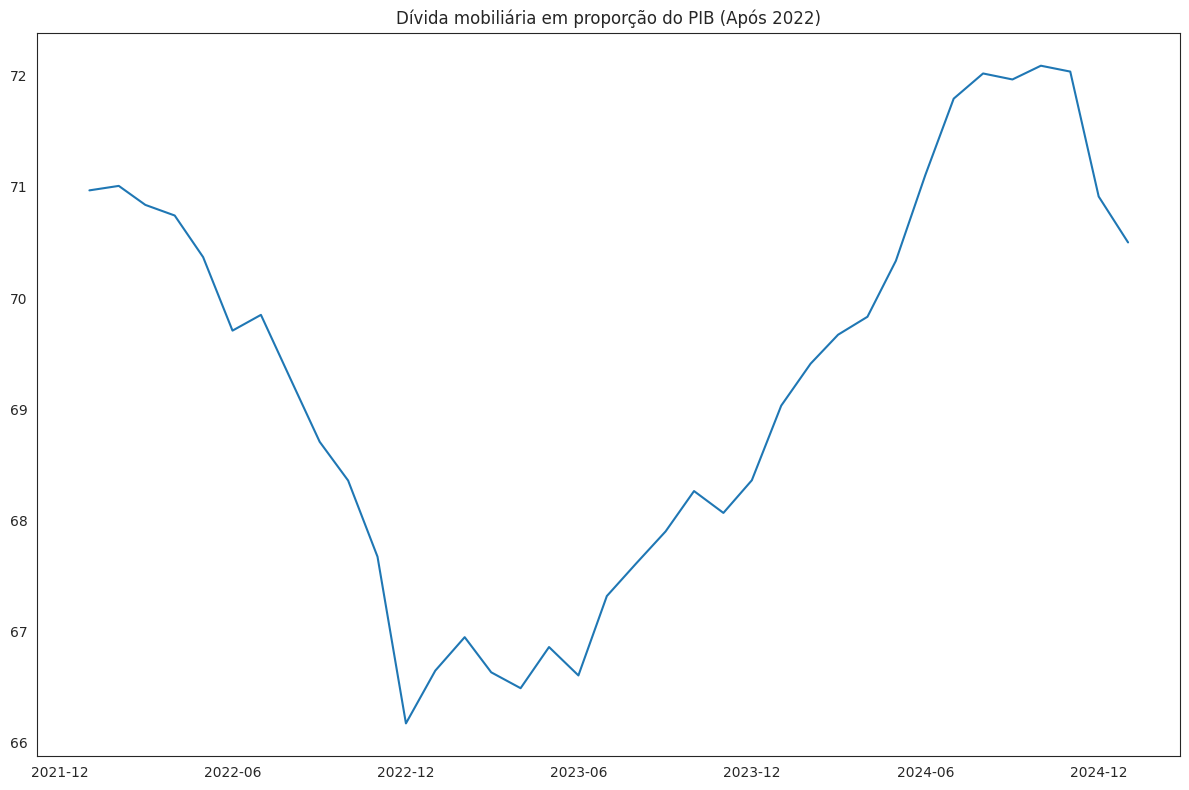

In [67]:
tb_divmobliq_graf_2022 = tb_divmobliq_graf[tb_divmobliq_graf['data'].dt.year >= 2022]

plt.figure(figsize=(12, 8))
sns.lineplot(data=tb_divmobliq_graf_2022, x='data', y='values', hue='classif', legend=False)
plt.title('Dívida mobiliária em proporção do PIB (Após 2022)')
plt.xlabel(None)
plt.ylabel(None)
ax = plt.gca()
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[12,6]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()